## Libraries 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
import json

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier
#!pip install lightgbm
import lightgbm as lgb

In [7]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Model
#from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.models import Model
from pathlib import Path

In [8]:
#!pip install livelossplot

In [9]:
from tensorflow.keras.optimizers import Adam
from livelossplot.inputs.keras import PlotLossesCallback
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model

In [50]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , AveragePooling2D
from tensorflow.keras.optimizers import SGD
from keras.layers import LeakyReLU

In [11]:
#! pip install fast_ml

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [13]:
from sklearn.metrics import f1_score

---------------

## Functions

In [14]:
def checkBalance(dataset,target_name):
    print("=======================================")
    print(f"Target Name : {target_name}")
    print("=======================================")
    print("value count")
    print(dataset[target_name].value_counts())
    print("=======================================")
    sns.histplot(x =target_name,data = dataset)
    plt.show()

In [15]:
def check_unique(dataframe,feature_name,target_name):
    # get a list of the unique values 
    uniqueLst = list(dataframe[feature_name].unique())
    # the length of the unique values 
    uniquelength = len(uniqueLst)
    # count the appenrance of each value in the dataset 
    count = dataframe[feature_name].value_counts()
    sorted_count = count.sort_values() 
    # print some information about the feature 
    print(f"Feature : {feature_name}")
    print(f"Number of unique values : {uniquelength}")
    print("=================================")
    print("(Attack'category,count)")
    print(sorted_count)
    print("=================================")
    #sns.histplot(data=, x=feature_name,hue="label", kde=True)
    sns.displot(x =feature_name,hue=target_name,data = dataframe, kind="kde", multiple="stack")
    plt.show()

In [16]:
def count_number_word(lst_of_lst):
    
    wv_lens =[]

    for x in lst_of_lst:
         wv_lens.append(len(x))

    myset = set(wv_lens)

    counts = [wv_lens.count(x)for x in myset]

    df2 = pd.DataFrame({
        "number of words":list(myset),
        "count":counts
    })
    
    return df2


In [17]:
def padd_zeros(row,n_words):
    # get number of words in this row
    length = len(row)
    # create new list that contain the value of the new length 
    new_lst = []
    
    for i in range(n_words):
        if i < length:
            new_lst.append(row[i])
        else:
    
            listofzeros = [0]*100
            new_lst.append(list(listofzeros))   
        
        
    row = new_lst
    
    return row

In [18]:
def prepare_equalWords_data(data,n_words):
    # create a new data frame 
    nemDF = data.copy()
    # pad zeros 
    nemDF['word_vector'] = nemDF['word_vector'].apply(lambda row: padd_zeros(row,n_words)) 
    # recount again 
    nemDF['word_count']  = nemDF['word_vector'].apply(lambda x: len(x))    
    # encode the label to be 0 and 1 instead 1 and 2 
    nemDF['label']  = nemDF['label'].apply(lambda x: int(x-1))    
    
    return nemDF

In [19]:
def visualize_class(data,y):
    plt.figure(figsize=(20,20))
    
    s= [v== y for v in data['label']]
    idxs = np.flatnonzero(s)
    idxs = np.random.choice(idxs, 5, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(1,5, i+1)
        plt.imshow(data['word_vector'][idx])
        plt.axis('off')
        plt.title(y)
    plt.show()
            
def visualize_classes(data,classes):
    for y in classes:
        visualize_class(data,y)
    

In [20]:
def normalize_lst(a):
    lst = np.array(a).reshape(-1,1)
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    normalizedlist=scaler.fit_transform(lst)
    return normalizedlist

In [21]:
def get_words(data_frame,n_words):    
    new_x=[]

    for i in range(len(data_frame)):
            templist= np.array([]) 
            np_word = np.array(data_frame['word_vector'][i])
            templist= np.append(templist,np_word[:n_words])
            
            if(np_word.shape[0] <  n_words):
                numeToAdd = n_words - np_word.shape[0]
                templist= np.append(templist, np.zeros(100*numeToAdd))
            
            templist=templist.tolist()
            new_x.append(templist) 

    return new_x

In [22]:
import keras.backend as K
def F1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [81]:
def Load_weight_predict_f1_score(model,weightFileName,model_name):
    # initialize the best trained weights.
    print("=================================================")    
    model.load_weights(weightFileName) 
    
    preds_train = model.predict(X_train_reshaped)
    pred_classes_train = [int(round(i[0])) for i in preds_train]
    f1_score_value_train = f1_score(y_train, pred_classes_train)
    
    preds_val = model.predict(X_val_reshaped)
    pred_classes_val = [int(round(i[0])) for i in preds_val]
    f1_score_value_val = f1_score(y_val, pred_classes_val)
    
    preds_test = model.predict(X_test_reshaped)
    pred_classes_test = [int(round(i[0])) for i in preds_test]
    f1_score_value_test = f1_score(y_test, pred_classes_test)
    
    print(f"F1-score for model : {model_name} = {f1_score_value_train}, using training   data")  
    print(f"F1-score for model : {model_name} = {f1_score_value_val}, using validation data")  
    print(f"F1-score for model : {model_name} = {f1_score_value_test}, using testing    data")  
    print("=================================================")

--------------

### read the data 

In [26]:
data5_2 = pd.read_csv("data5.csv")
data5_2['word_vector'] = [json.loads(x) for x in data5_2['word_vector']] # list of lists 

In [27]:
data5_2.head()

,Unnamed: 0,category,word_vector,label,word_count
0,0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,5
1,1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,5
2,2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,5
3,3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,5
4,4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,5


### make each row as only one list instead of list of lists 

In [28]:
X_oneLstPerRow = get_words(data5_2,5)

In [29]:
len(X_oneLstPerRow)

123040

### split the data 

In [30]:
y = data5_2['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_oneLstPerRow, y, test_size=0.2,stratify=y, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,stratify=y_train, random_state=1) 

In [32]:
pd.DataFrame(y_train).value_counts()

label
0        36912
1        36912
dtype: int64

In [33]:
pd.DataFrame(y_val).value_counts()

label
0        12304
1        12304
dtype: int64

In [34]:
pd.DataFrame(y_test).value_counts()

label
0        12304
1        12304
dtype: int64

<h3 style="color:maroon;"> Normalize each word to be in 0 to 1 scale </h3>

In [35]:
#lst = np.array().reshape(-1,1)
scaler  = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

### Reshape the data so it can be used as images 

In [36]:
X_train_reshaped =np.array([*X_train]).reshape(len(X_train),5,100,1)
X_val_reshaped   =np.array([*X_val]).reshape(len(X_val),5,100,1)
X_test_reshaped  =np.array([*X_test]).reshape(len(X_test),5,100,1)

In [37]:
X_train_reshaped[0].shape

(5, 100, 1)

In [38]:
X_val_reshaped[0].shape

(5, 100, 1)

In [39]:
X_test_reshaped[0].shape

(5, 100, 1)

--------

<h2 style="color:rgb(74, 70, 11);">Part 2</h2>

<h3 style="color:maroon;"> 1. Build the main architecture </h3>

In [40]:
model_1 = Sequential()

# input: 5*100 images with 1 channels -> (5, 100, 1) tensors.

# this applies 32 convolution filters of size 3x3 each.
model_1.add(Conv2D(64, (3, 3), activation='relu', input_shape=(5, 100, 1),padding='same'))
model_1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_1.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_1.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model_1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_1.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model_1.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_1.add(LeakyReLU(alpha=0.1))

model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())

#model = keras.applications.inception_v3.InceptionV3(weights= None, include_top=False, input_shape= (28,28,1))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(128, activation='relu'))

model_1.add(Dense(1, activation='sigmoid'))

In [41]:
model_1.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=[F1_score])

In [47]:
plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

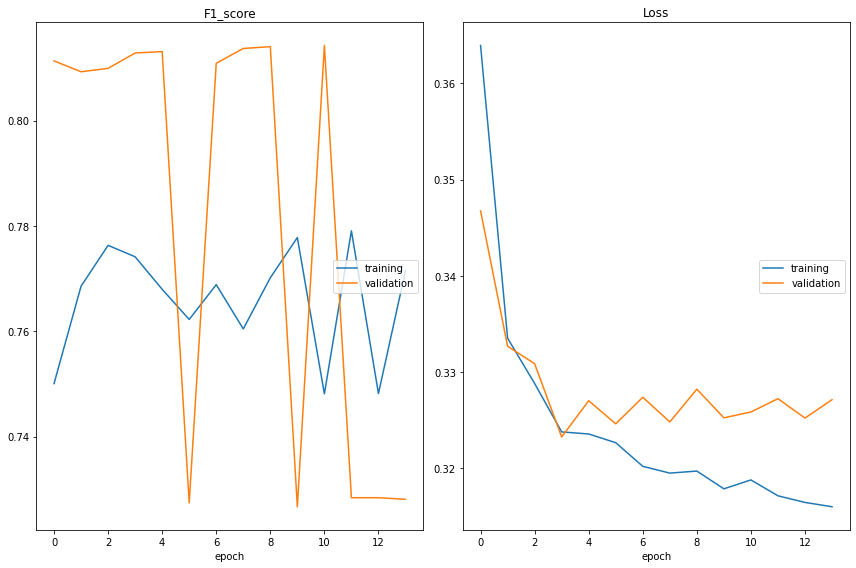

F1_score
	training         	 (min:    0.748, max:    0.779, cur:    0.772)
	validation       	 (min:    0.727, max:    0.814, cur:    0.728)
Loss
	training         	 (min:    0.316, max:    0.364, cur:    0.316)
	validation       	 (min:    0.323, max:    0.347, cur:    0.327)


In [48]:
# training
history = model_1.fit(X_train_reshaped,y_train, epochs = 100,validation_data = (X_val_reshaped,y_val),
                    verbose = 1,
                    batch_size=128,
                    callbacks=[tl_checkpoint_1, early_stop, plot_loss_1])

In [68]:
Load_weight_predict_f1_score(model_1,"tl_model_1.weights.best.hdf5","model_1")

F1-score for model : model_1 = 0.8160060608147663, using training   data
F1-score for model : model_1 = 0.8138656039576749, using validation data
F1-score for model : model_1 = 0.8118941667529063, using testing    data


--------

### 2. Modify the architecture by adding  L1, L2 regularization terms  to the last dense layer

In [42]:
model_2 = Sequential()

# input: 5*100 images with 1 channels -> (5, 100, 1) tensors.

# this applies 32 convolution filters of size 3x3 each.
model_2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(5, 100, 1),padding='same'))
model_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_2.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model_2.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_2.add(LeakyReLU(alpha=0.1))

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())

#model = keras.applications.inception_v3.InceptionV3(weights= None, include_top=False, input_shape= (28,28,1))
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(units=1024,activation='relu',
        kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-4)))

model_2.add(Dense(1, activation='sigmoid'))

In [43]:
model_2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=[F1_score])

In [57]:
plot_loss_2 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_2 = ModelCheckpoint(filepath='tl_model_2.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

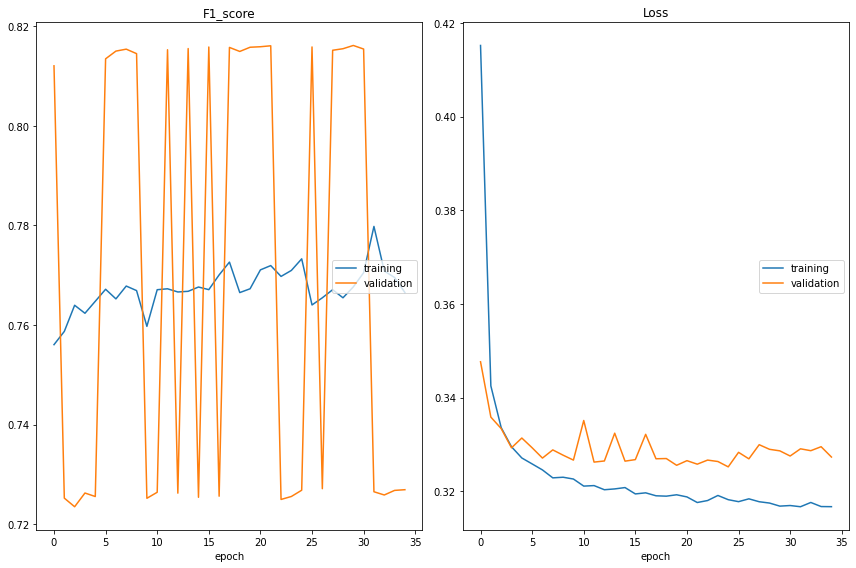

F1_score
	training         	 (min:    0.756, max:    0.780, cur:    0.767)
	validation       	 (min:    0.723, max:    0.816, cur:    0.727)
Loss
	training         	 (min:    0.317, max:    0.415, cur:    0.317)
	validation       	 (min:    0.325, max:    0.348, cur:    0.327)


In [58]:
# training
history_2 = model_2.fit(X_train_reshaped,y_train, epochs = 100,validation_data = (X_val_reshaped,y_val),
                    verbose = 1,
                    batch_size=128,
                    callbacks=[tl_checkpoint_2, early_stop, plot_loss_2])

In [69]:
Load_weight_predict_f1_score(model_2,"tl_model_2.weights.best.hdf5","model_2")

F1-score for model : model_2 = 0.7285623725735432, using training   data
F1-score for model : model_2 = 0.7283456486042692, using validation data
F1-score for model : model_2 = 0.7115723923196678, using testing    data


--------------

# 3. Try different optimizer

In [44]:
model_3 = Sequential()

# input: 5*100 images with 1 channels -> (5, 100, 1) tensors.

# this applies 32 convolution filters of size 3x3 each.
model_3.add(Conv2D(64, (3, 3), activation='relu', input_shape=(5, 100, 1),padding='same'))
model_3.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_3.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_3.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_3.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_3.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model_3.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_3.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model_3.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_3.add(LeakyReLU(alpha=0.1))

model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())

#model = keras.applications.inception_v3.InceptionV3(weights= None, include_top=False, input_shape= (28,28,1))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(units=1024,activation='relu',
        kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-4)))

model_3.add(Dense(1, activation='sigmoid'))

In [45]:
model_3.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=[F1_score])

In [72]:
plot_loss_3 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_3 = ModelCheckpoint(filepath='tl_model_3.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

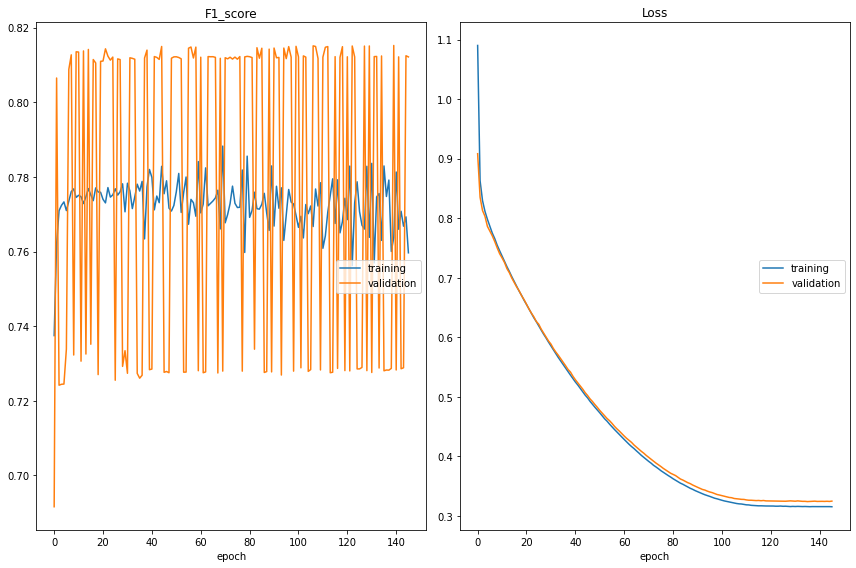

F1_score
	training         	 (min:    0.737, max:    0.788, cur:    0.760)
	validation       	 (min:    0.692, max:    0.815, cur:    0.812)
Loss
	training         	 (min:    0.315, max:    1.090, cur:    0.315)
	validation       	 (min:    0.324, max:    0.908, cur:    0.325)


In [73]:
# training
history_3 = model_3.fit(X_train_reshaped,y_train, epochs = 150,validation_data = (X_val_reshaped,y_val),
                    verbose = 1,
                    batch_size=128,
                    callbacks=[tl_checkpoint_3, early_stop, plot_loss_3])

In [74]:
Load_weight_predict_f1_score(model_3,"tl_model_3.weights.best.hdf5","model_3")

F1-score for model : model_3 = 0.7298184429172222, using training   data
F1-score for model : model_3 = 0.7297559977492455, using validation data
F1-score for model : model_3 = 0.7131558542258982, using testing    data


--------------------------------------------

## 4. Schedule to decrease the learning rate 

In [71]:
model_4 = Sequential()

# input: 5*100 images with 1 channels -> (5, 100, 1) tensors.

# this applies 32 convolution filters of size 3x3 each.
model_4.add(Conv2D(64, (3, 3), activation='relu', input_shape=(5, 100, 1),padding='same'))
model_4.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_4.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_4.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_4.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_4.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model_4.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_4.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model_4.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_4.add(LeakyReLU(alpha=0.1))

model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())

#model = keras.applications.inception_v3.InceptionV3(weights= None, include_top=False, input_shape= (28,28,1))
model_4.add(Dense(256, activation='relu'))
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(units=1024,activation='relu',
        kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-4)))

model_4.add(Dense(1, activation='sigmoid'))

In [72]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

In [73]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [74]:
model_4.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=[F1_score])

In [89]:
plot_loss_4 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_4 = ModelCheckpoint(filepath='tl_model_4.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

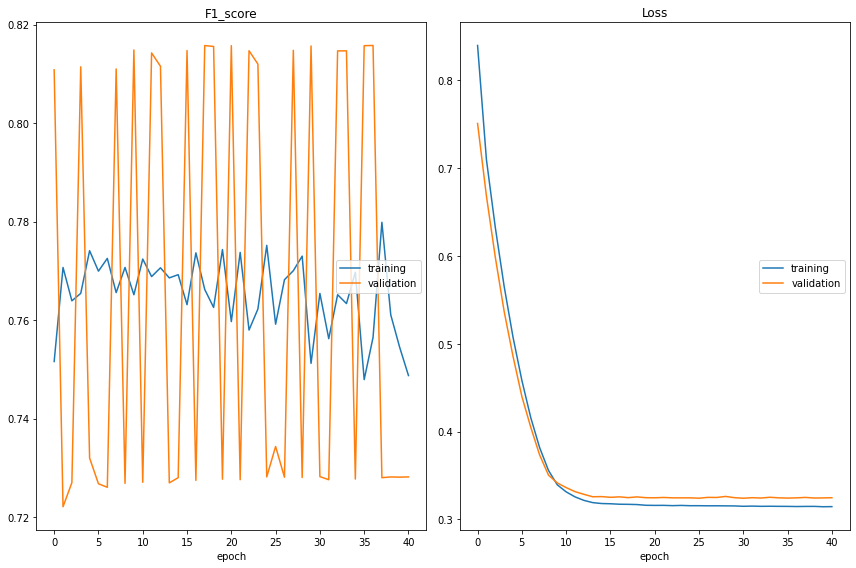

F1_score
	training         	 (min:    0.748, max:    0.780, cur:    0.749)
	validation       	 (min:    0.722, max:    0.816, cur:    0.728)
Loss
	training         	 (min:    0.314, max:    0.839, cur:    0.315)
	validation       	 (min:    0.324, max:    0.751, cur:    0.325)


In [90]:
# training
history_4 = model_4.fit(X_train_reshaped,y_train, epochs = 100,validation_data = (X_val_reshaped,y_val),
                    verbose = 1,
                    batch_size=128,
                    callbacks=[tl_checkpoint_4, early_stop, plot_loss_4,lrate])

In [91]:
Load_weight_predict_f1_score(model_4,"tl_model_4.weights.best.hdf5","model_4")

F1-score for model : model_4 = 0.7299943609986159, using training   data
F1-score for model : model_4 = 0.7299785210187174, using validation data
F1-score for model : model_4 = 0.713953608513716, using testing    data


-------------------------------

## 5. change the maxPooling layer with average Pooling 

In [51]:
model_5 = Sequential()

# input: 5*100 images with 1 channels -> (5, 100, 1) tensors.

# this applies 32 convolution filters of size 3x3 each.
model_5.add(Conv2D(64, (3, 3), activation='relu', input_shape=(5, 100, 1),padding='same'))
model_5.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_5.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_5.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_5.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_5.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_5.add(Dropout(0.25))

model_5.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model_5.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))

model_5.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model_5.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model_5.add(LeakyReLU(alpha=0.1))

model_5.add(AveragePooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.25))

model_5.add(Flatten())

#model = keras.applications.inception_v3.InceptionV3(weights= None, include_top=False, input_shape= (28,28,1))
model_5.add(Dense(256, activation='relu'))
model_5.add(Dense(128, activation='relu'))
model_5.add(Dense(units=1024,activation='relu',
        kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-4)))

model_5.add(Dense(1, activation='sigmoid'))

In [46]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [52]:
model_5.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=[F1_score])

In [48]:
plot_loss_5 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_5 = ModelCheckpoint(filepath='tl_model_5.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

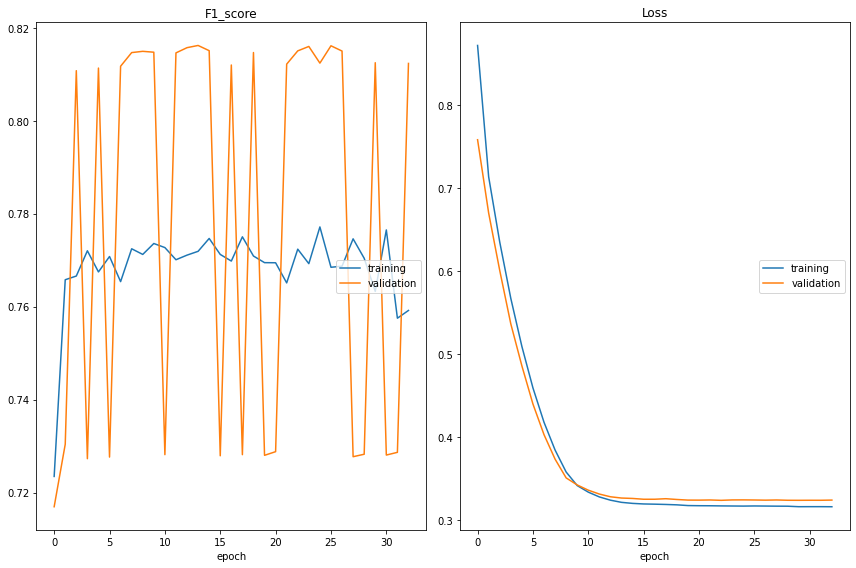

F1_score
	training         	 (min:    0.723, max:    0.777, cur:    0.759)
	validation       	 (min:    0.717, max:    0.816, cur:    0.812)
Loss
	training         	 (min:    0.316, max:    0.872, cur:    0.316)
	validation       	 (min:    0.323, max:    0.758, cur:    0.324)


In [50]:
# training
history_5 = model_5.fit(X_train_reshaped,y_train, epochs = 100,validation_data = (X_val_reshaped,y_val),
                    verbose = 1,
                    batch_size=128,
                    callbacks=[tl_checkpoint_5, early_stop, plot_loss_5,lrate])

In [52]:
Load_weight_predict_f1_score(model_5,"tl_model_5.weights.best.hdf5","model_5")

F1-score for model : model_5 = 0.8194176969973221, using training   data
F1-score for model : model_5 = 0.8161676851124842, using validation data
F1-score for model : model_5 = 0.8155147033651706, using testing    data


--------------------

## 5. Compare the different models in terms of  testing performance

In [82]:
Experiment_F1_scores = [0.8118941667529063,0.7115723923196678,0.7131558542258982,0.713953608513716,0.8155147033651706]

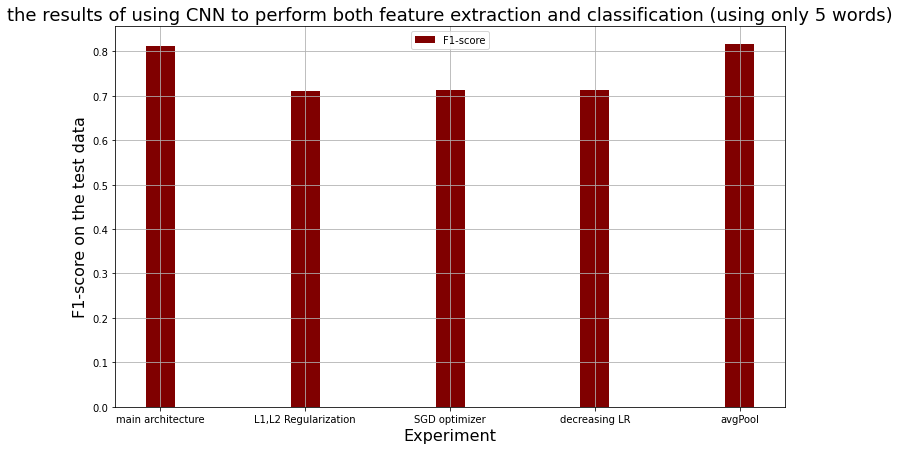

In [85]:
plt.figure(figsize=(12, 7))

X_values = ["main architecture","L1,L2 Regularization","SGD optimizer", "decreasing LR","avgPool"]

X_axis = np.arange(len(X_values))

plt.bar(X_axis, Experiment_F1_scores,width=0.2, label = 'F1-score',color="maroon")

plt.xticks(X_axis, X_values)
plt.xlabel("Experiment",fontsize=16)
plt.ylabel("F1-score on the test data",fontsize=16)
plt.title(f"the results of using CNN to perform both feature extraction and classification (using only 5 words)",fontsize=18)

plt.legend()
plt.grid()
plt.show()

----------------

## References 

[1] https://www.csmining.org/cdmc2021/index.php?id=5

[2] https://keras.io/api/applications/

[3] https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1#:~:text=A%20typical%20way%20is%20to,for%20use%20in%20SGD%20optimizer.
